In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/climate-change-impact-on-agriculturee/climate_change_impact_on_agriculture_2024.csv


In [3]:
import pandas as pd

# Définir le chemin du fichier Kaggle
file_path = "/kaggle/input/climate-change-impact-on-agriculturee/climate_change_impact_on_agriculture_2024.csv"

# Charger le dataset
df = pd.read_csv(file_path)

# Vérifier les premières lignes
print(df.head())


   Year Country         Region  Crop_Type  Average_Temperature_C  \
0  2001   India    West Bengal       Corn                   1.55   
1  2024   China          North       Corn                   3.23   
2  2001  France  Ile-de-France      Wheat                  21.11   
3  2001  Canada       Prairies     Coffee                  27.85   
4  1998   India     Tamil Nadu  Sugarcane                   2.19   

   Total_Precipitation_mm  CO2_Emissions_MT  Crop_Yield_MT_per_HA  \
0                  447.06             15.22                 1.737   
1                 2913.57             29.82                 1.737   
2                 1301.74             25.75                 1.719   
3                 1154.36             13.91                 3.890   
4                 1627.48             11.81                 1.080   

   Extreme_Weather_Events  Irrigation_Access_%  Pesticide_Use_KG_per_HA  \
0                       8                14.54                    10.08   
1                       8 

The dataset has 10.000 lines and 15 columns. Feel like i'm gonna have a lo o fun.

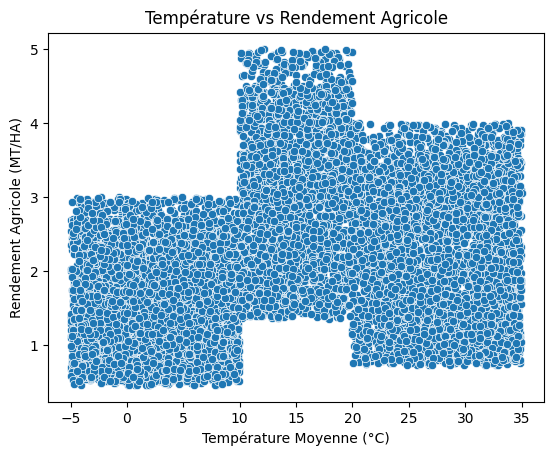

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=df['Average_Temperature_C'], y=df['Crop_Yield_MT_per_HA'])
plt.title("Température vs Rendement Agricole")
plt.xlabel("Température Moyenne (°C)")
plt.ylabel("Rendement Agricole (MT/HA)")
plt.show()


I used seaborn to see the relationship between average temperature and yield. the link is huge.

In [5]:
df_encoded = pd.get_dummies(df, drop_first=True)


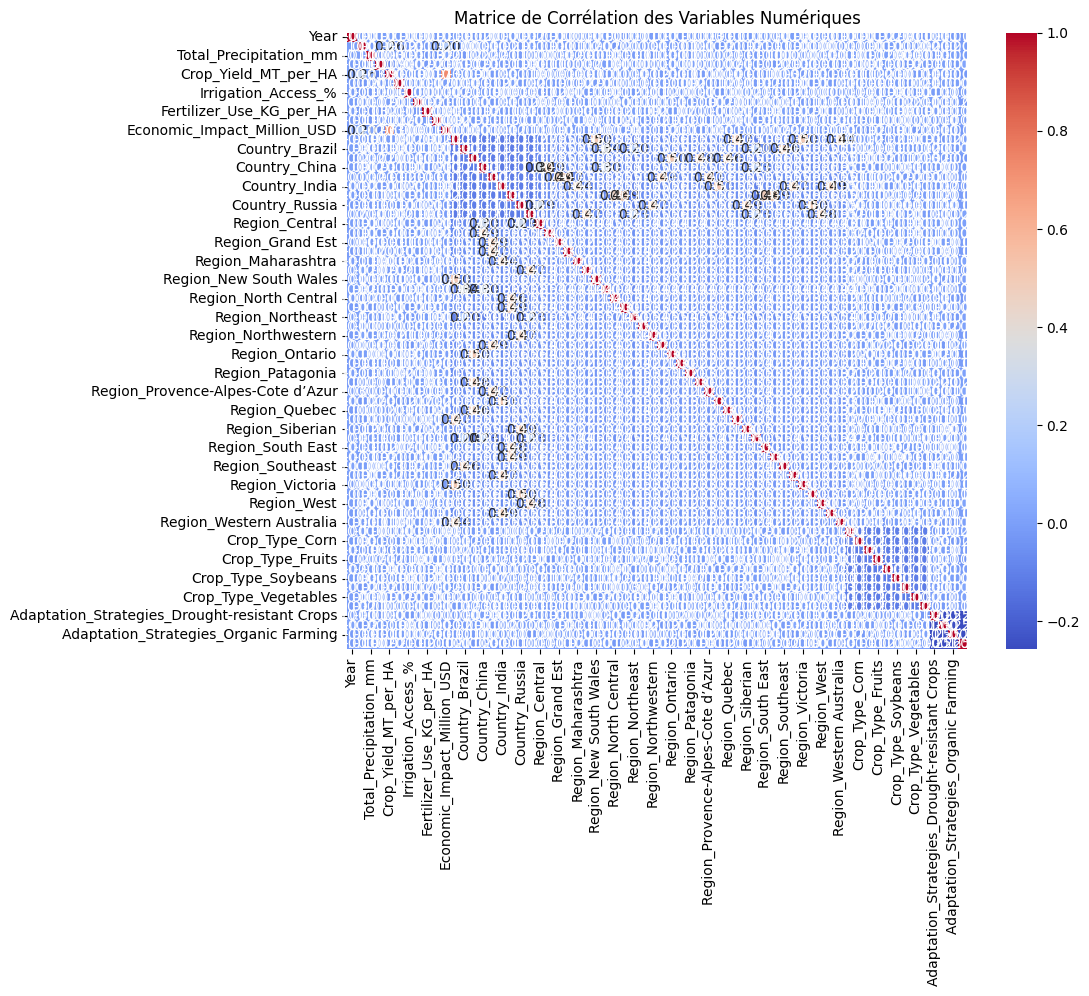

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df_encoded.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de Corrélation des Variables Numériques")
plt.show()


Seaborn again on action. Now,you can have the links btwn various features. The colors shows strength and direction of the corelation.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

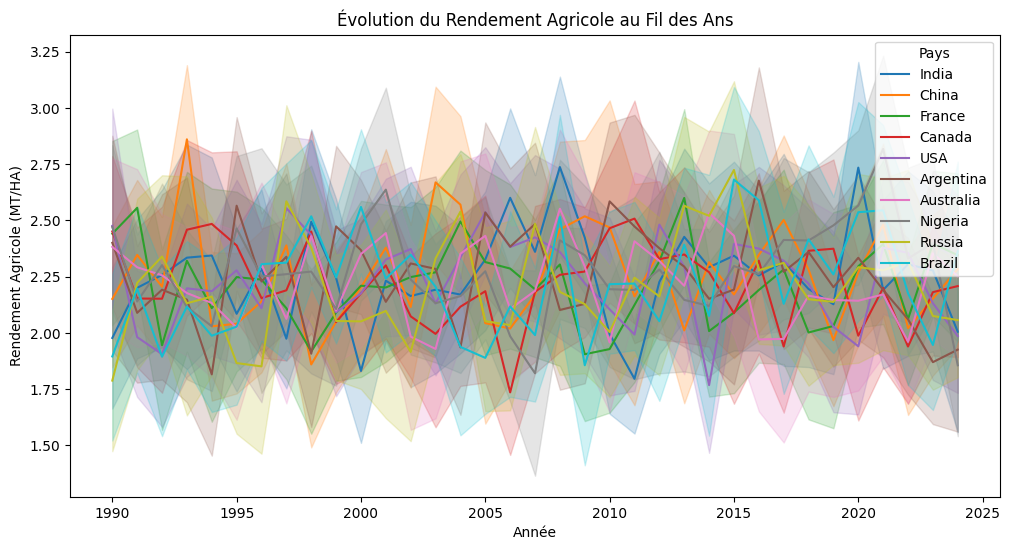

In [7]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['Year'], y=df['Crop_Yield_MT_per_HA'], hue=df['Country'])
plt.title("Évolution du Rendement Agricole au Fil des Ans")
plt.xlabel("Année")
plt.ylabel("Rendement Agricole (MT/HA)")
plt.legend(title="Pays")
plt.show()


Just to see the evolution of crop production for the 35 years.

In [8]:
vulnerable_countries = df.groupby("Country")["Crop_Yield_MT_per_HA"].std().sort_values(ascending=False).head(10)
print(vulnerable_countries)


Country
Australia    1.015822
India        1.015366
China        1.012456
Nigeria      1.006192
Argentina    1.001634
Russia       1.001536
France       0.999397
Brazil       0.996707
Canada       0.973064
USA          0.961462
Name: Crop_Yield_MT_per_HA, dtype: float64


From Australia to Russia. They were highly vulnerable to CC. 

   Year Country         Region  Crop_Type  Average_Temperature_C  \
0  2001   India    West Bengal       Corn                   1.55   
1  2024   China          North       Corn                   3.23   
2  2001  France  Ile-de-France      Wheat                  21.11   
3  2001  Canada       Prairies     Coffee                  27.85   
4  1998   India     Tamil Nadu  Sugarcane                   2.19   

   Total_Precipitation_mm  CO2_Emissions_MT  Crop_Yield_MT_per_HA  \
0                  447.06             15.22                 1.737   
1                 2913.57             29.82                 1.737   
2                 1301.74             25.75                 1.719   
3                 1154.36             13.91                 3.890   
4                 1627.48             11.81                 1.080   

   Extreme_Weather_Events  Irrigation_Access_%  Pesticide_Use_KG_per_HA  \
0                       8                14.54                    10.08   
1                       8 

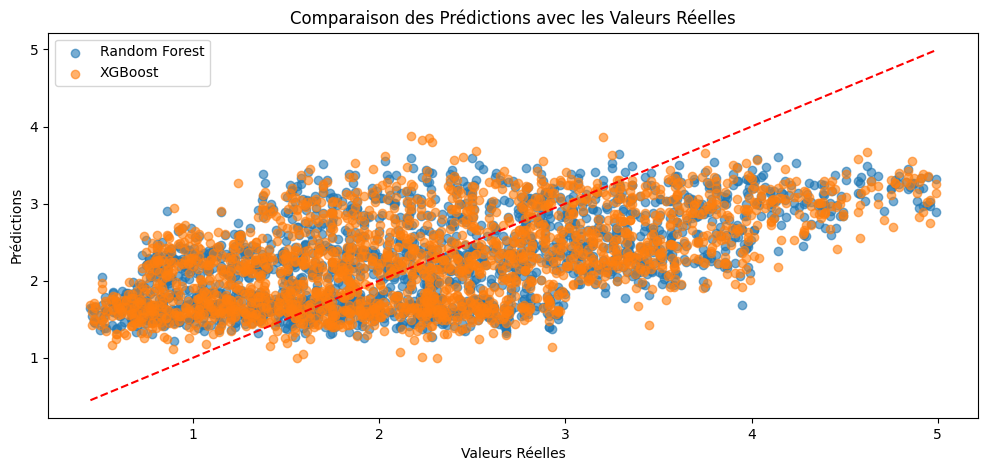

In [9]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Charger les données
file_path = "/kaggle/input/climate-change-impact-on-agriculturee/climate_change_impact_on_agriculture_2024.csv"
df = pd.read_csv(file_path)

# Afficher les premières lignes
print(df.head())

# Sélection des features et de la target
features = [
    "Year", "Average_Temperature_C", "Total_Precipitation_mm", "CO2_Emissions_MT",
    "Extreme_Weather_Events", "Irrigation_Access_%", "Pesticide_Use_KG_per_HA",
    "Fertilizer_Use_KG_per_HA", "Soil_Health_Index"
]

target = "Crop_Yield_MT_per_HA"

# Encodage des variables catégoriques
label_encoders = {}
for col in ["Country", "Region", "Crop_Type", "Adaptation_Strategies"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Séparation des données
X = df[features]
y = df[target]

# Normalisation des features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Division en train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialisation des modèles
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Entraînement des modèles
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Prédictions
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

# Évaluation des performances
def evaluate_model(y_test, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"📊 {model_name} - RMSE: {rmse:.2f}, R²: {r2:.2f}")

evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")

# Visualisation des performances
plt.figure(figsize=(12, 5))
plt.scatter(y_test, y_pred_rf, label="Random Forest", alpha=0.6)
plt.scatter(y_test, y_pred_xgb, label="XGBoost", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valeurs Réelles")
plt.ylabel("Prédictions")
plt.legend()
plt.title("Comparaison des Prédictions avec les Valeurs Réelles")
plt.show()


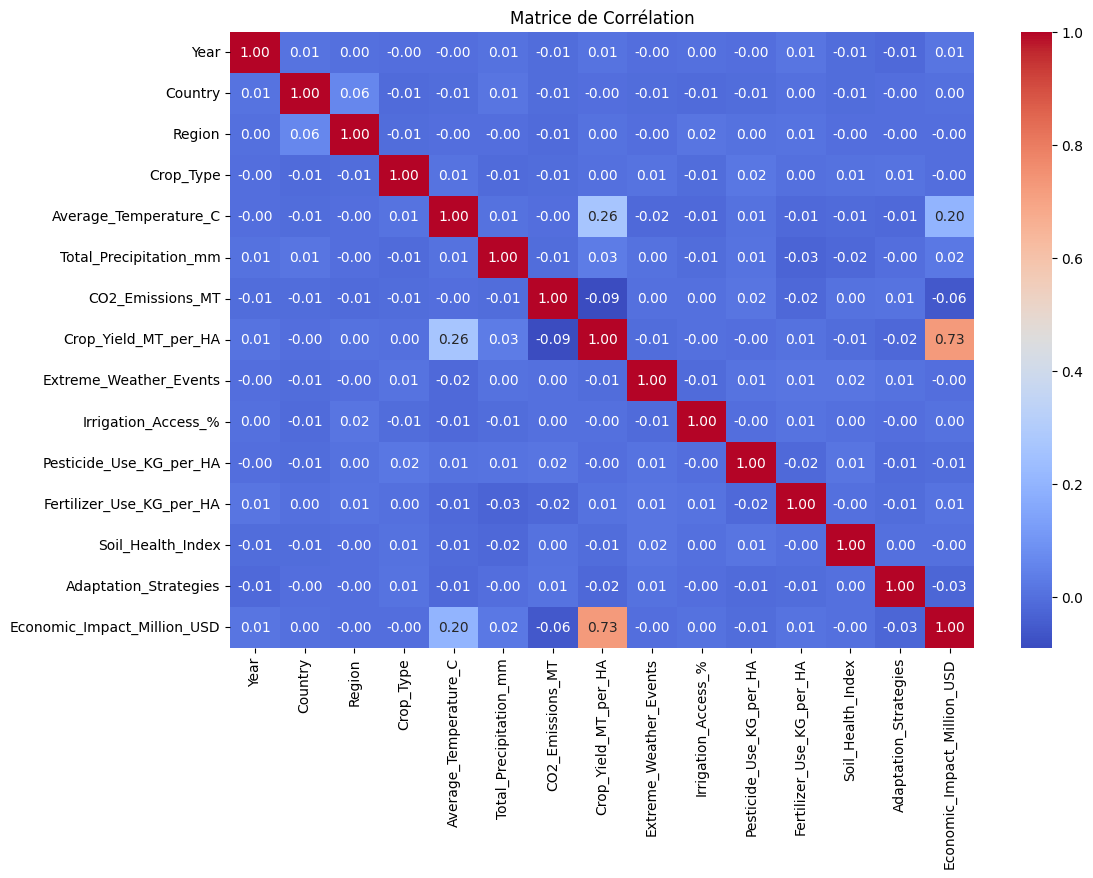

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de Corrélation")
plt.show()


In [11]:
df["Log_Economic_Impact"] = np.log1p(df["Economic_Impact_Million_USD"])


In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring="r2", n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Meilleurs paramètres:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Meilleurs paramètres: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [13]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Diviser tes données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["Crop_Yield_MT_per_HA"]), df["Crop_Yield_MT_per_HA"], test_size=0.2, random_state=42)

# Initialiser et entraîner le modèle LGBMRegressor
lgbm = LGBMRegressor(n_estimators=200, max_depth=10)
lgbm.fit(X_train, y_train)

# Prédictions sur les données de test
y_pred = lgbm.predict(X_test)

# Évaluer les performances du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Afficher les résultats
print(f"Erreur quadratique moyenne (MSE): {mse}")
print(f"R²: {r2}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003787 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2401
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 15
[LightGBM] [Info] Start training from score 2.232193
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Erreur quadratique moyenne (MSE): 0.40733325743415005
R²: 0.6140747562232789
